<a href="https://colab.research.google.com/github/KARTHIKK112/AIML_2303A52404/blob/main/LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIML LAB EXTERNAL (2024 – 25)**
# **SET – 4 (Support Vector Machine (SVM)**

# **1. Implement SVM with a linear kernel on a binary classification dataset.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
data = pd.read_csv("/content/weather_forecast_data.csv")

In [ ]:
X = data.drop(columns=["Rain"])
y = data["Rain"]

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       443
           1       0.73      0.61      0.67        57

    accuracy                           0.93       500
   macro avg       0.84      0.79      0.81       500
weighted avg       0.93      0.93      0.93       500



**2. Evaluate the model’s performance using accuracy and confusion matrix.**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.93


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[430  13]
 [ 22  35]]


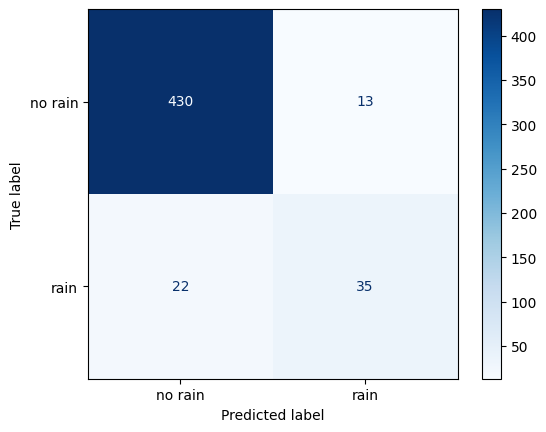

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")

# **3. Visualize the decision boundary of the linear kernel SVM.**

In [ ]:
X_vis = X[:, :2]

In [ ]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)

In [ ]:
svm_model_vis = SVC(kernel='linear', random_state=42)
svm_model_vis.fit(X_train_vis, y_train_vis)

SVC(kernel='linear', random_state=42)

In [ ]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [ ]:
Z = svm_model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

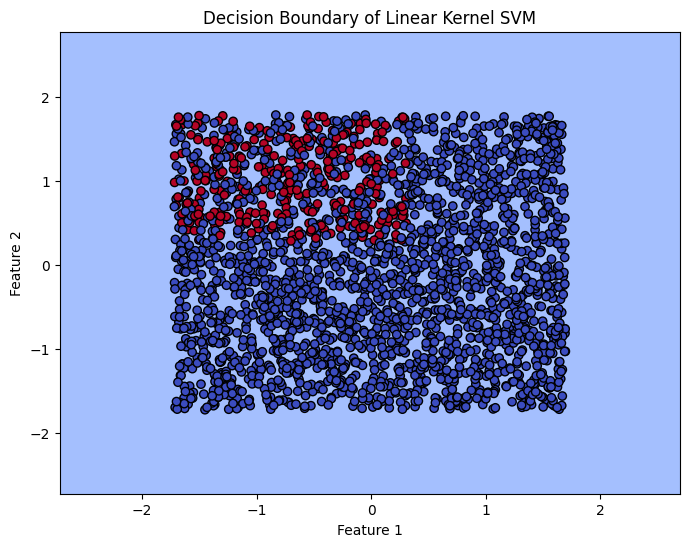

In [ ]:
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary of Linear Kernel SVM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# **4. Use a non-linear kernel (e.g., RBF) and evaluate the model’s performance.**

In [ ]:
svm_model_rbf = SVC(kernel='rbf', random_state=42)
svm_model_rbf.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
y_pred_rbf = svm_model_rbf.predict(X_test)

In [ ]:
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel SVM Model Accuracy: {accuracy_rbf:.2f}")

RBF Kernel SVM Model Accuracy: 0.98


In [ ]:
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix for RBF Kernel:")
print(conf_matrix_rbf)

Confusion Matrix for RBF Kernel:
[[438   5]
 [  5  52]]


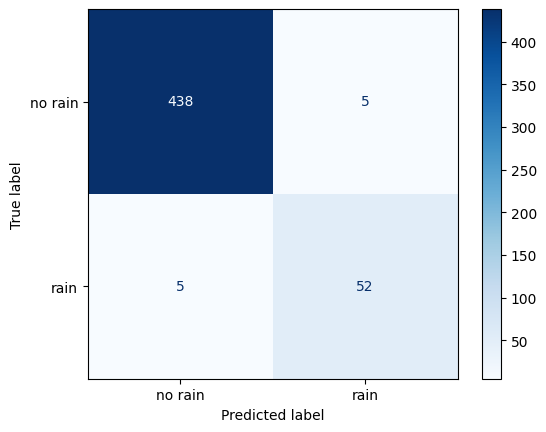

In [ ]:
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf, display_labels=label_encoder.classes_)
disp_rbf.plot(cmap="Blues")

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
}

In [ ]:
grid = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [ ]:
print("Best Parameters:", grid.best_params_)
svm_model_rbf_tuned = grid.best_estimator_

Best Parameters: {'C': 1, 'gamma': 1}


In [ ]:
y_pred_rbf_tuned = svm_model_rbf_tuned.predict(X_test)

In [ ]:
accuracy_rbf_tuned = accuracy_score(y_test, y_pred_rbf_tuned)
print(f"Tuned RBF Kernel SVM Model Accuracy: {accuracy_rbf_tuned:.2f}")

Tuned RBF Kernel SVM Model Accuracy: 0.98


# **5. Compare the SVM model’s performance with and without feature scaling.**

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model_no_scaling = SVC(kernel='linear', random_state=42)
svm_model_no_scaling.fit(X_train_raw, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_no_scaling = svm_model_no_scaling.predict(X_test_raw)

In [ ]:
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)

In [ ]:
print(f"Accuracy Without Scaling: {accuracy_no_scaling:.2f}")
print("Confusion Matrix Without Scaling:")
print(conf_matrix_no_scaling)

Accuracy Without Scaling: 0.93
Confusion Matrix Without Scaling:
[[430  13]
 [ 22  35]]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
svm_model_with_scaling = SVC(kernel='linear', random_state=42)
svm_model_with_scaling.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_with_scaling = svm_model_with_scaling.predict(X_test_scaled)

In [ ]:
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)

In [ ]:
print(f"\nAccuracy With Scaling: {accuracy_with_scaling:.2f}")
print("Confusion Matrix With Scaling:")
print(conf_matrix_with_scaling)


Accuracy With Scaling: 0.93
Confusion Matrix With Scaling:
[[430  13]
 [ 22  35]]


In [ ]:
print("\nPerformance Comparison:")
print(f"Accuracy Without Scaling: {accuracy_no_scaling:.2f}")
print(f"Accuracy With Scaling: {accuracy_with_scaling:.2f}")


Performance Comparison:
Accuracy Without Scaling: 0.93
Accuracy With Scaling: 0.93
